In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display the first few rows of the data
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [13]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 1. Variance Threshold

In [14]:
print(X.var())

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [15]:
# Applying Variance Threshold
thresholder = VarianceThreshold(threshold=0.2)  # Example threshold
X_high_variance = thresholder.fit_transform(X)

# Convert the numpy array back to a DataFrame
# Retrieve the retained feature indices
features = thresholder.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns=[X.columns[i] for i in features])

print("Shape of data after Variance Threshold:", X_high_variance_df.shape)
print(X_high_variance_df.head())

Shape of data after Variance Threshold: (150, 3)
   sepal length (cm)  petal length (cm)  petal width (cm)
0                5.1                1.4               0.2
1                4.9                1.4               0.2
2                4.7                1.3               0.2
3                4.6                1.5               0.2
4                5.0                1.4               0.2


# 2. Correlation

In [16]:
# Calculate the correlation matrix
corr_matrix = X.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Pairs with high correlation (|correlation| > 0.90):
petal length (cm) and petal width (cm): 0.96


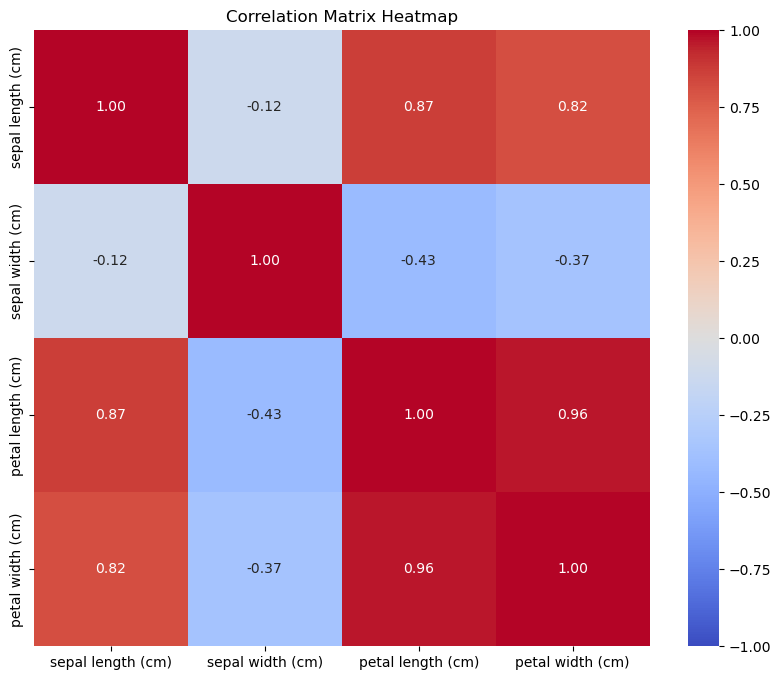

In [17]:
# Define threshold
threshold = 0.9

# Find pairs with high correlation
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Print out high correlation pairs
print("Pairs with high correlation (|correlation| > {:.2f}):".format(threshold))
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


# 3. Chi-Squared

In [20]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Discretize the numerical features using KBinsDiscretizer
# This transforms continuous data into categorical data
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = discretizer.fit_transform(X)

# Perform Chi-Square feature selection
selector = SelectKBest(chi2, k=3)  # Select the top k features
X_selected = selector.fit_transform(X_binned, y)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_feature_names.tolist())

# Print the shape of the new dataset with selected features
print("Original shape:", X.shape)
print("New shape after feature selection:", X_selected.shape)

Selected Features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Original shape: (150, 4)
New shape after feature selection: (150, 3)


/Users/slee/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


# 4. ANOVA

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform ANOVA feature selection using f_classif
selector = SelectKBest(score_func=f_classif, k=3)  # Select the top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_feature_names.tolist())

# Print the shape of the new dataset with selected features
print("Original shape:", X_train.shape)
print("New shape after feature selection:", X_train_selected.shape)

Selected Features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Original shape: (120, 4)
New shape after feature selection: (120, 3)
